# HW#4 Multi-layer Neural Network

안녕하세요, 광운대학교 로봇학부의 오정현 교수입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1) 참고

이번 과제는 Multi-layer Neural Network를 이용하여 Regression 및 Classification을 해보는 것입니다.





# 1 - Package import

먼저 과제에 필요한 package를 import 합니다.
- [numpy](www.numpy.org) 파이썬에서 행렬 연산을 위한 핵심 라이브러리입니다.
- [matplotlib](http://matplotlib.org) 파이썬에서 plot을 위한 라이브러리입니다.
- [tensorflow](http://tensorflow.org) 딥러닝 라이브러리입니다.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


#2. Regression
우리가 지난 시간에 했던 Linear regression을 Multi-layer Neural Network를 이용하여 해보도록 하겠습니다.


##2.1 Data preparation
우리는 데이터셋 3개를 준비할 것입니다.

*   trainX : 학습에 쓸 데이터 X
*   trainY : 학습에 쓸 데이터 Y
*   testX : 테스트에 쓸 데이터 X

먼저 trainX와 trainY를 이용하여 학습에 쓸 데이터를 만들어 봅시다.

trainX는 0~10 사이에 값을 가진 실수 100개로 이루어진 데이터입니다.

trainY는 다음 식을 만족하며 적절하게 랜덤값을 추가하여 노이즈가 있는 데이터를 만들어 보시기 바랍니다. trainY의 개수도 100개가 되겠죠?

$$trainY = 3 *trainX + 4 + random noise\tag{1}$$

testX는 우리가 학습한 모델을 테스트하기 위해 만드는 데이터입니다.
0~10 사이에 값을 가진 실수 10개를 만들어 봅시다. np.random.randn을 이용해 보세요.



In [78]:
### START CODE HERE ###
trainX = np.random.rand(100,)
testX = np.random.rand(10,)
trainY = 3*trainX + 4 +np.random.randn(*trainX.shape)*0.05
### END CODE HERE ###

trainX.shape

(100,)

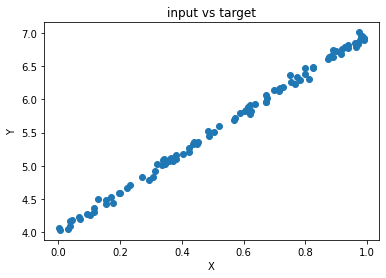

In [79]:
assert(trainX.shape == (100,))
assert(trainY.shape == (100,))
assert(testX.shape == (10,))

plt.scatter(trainX, trainY)
plt.title('input vs target')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##2.2 Multi-layer Neural Network Model
tensorflow의 keras 모듈은 딥러닝 모델 구성을 쉽게 할 수 있도록 라이브러리를 제공하고 있습니다. 모델을 만드는 법은 아주 쉽습니다.

input - hidden layer 1 - hidden layer 2 - output으로 이루어진 모델을 만들겠습니다. 이 때 input의 dimension을 inputdim output의 dimension을 outputdim이라고 하고 hidden layer1의 node 개수는 num1, layer2의 node 개수는 num2라고 하겠습니다. activation 함수는 relu 함수를 쓰도록 하겠습니다. 그러면 다음과 같이 구성하면 Multi-layer neural network 모델을 만들 수 있습니다.

```python
model = Sequential()
model.add(Dense(num1, input_dim=inputdim, activation='relu'))
model.add(Dense(num2, activation='relu'))
model.add(Dense(outputdim))
```

우리가 학습하고자 하는 model의 input dim과 output dim은 몇일까요? hidden node의 개수는 64로, activation 함수는 relu 함수를 써서 모델을 만들어보시기 바랍니다.

model.summary() 를 실행하면 우리의 모델 및 파라미터 개수를 확인할 수 있습니다.

In [80]:
tf.__version__

'2.2.0-rc3'

In [0]:
### START CODE HERE ###
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, input_shape = (1,), activation = 'relu'),
  tf.keras.layers.Dense(64,activation = 'relu'),
  tf.keras.layers.Dense(1)
                                    
])

### END CODE HERE ###

In [82]:
model.summary()

Model: "sequential_433"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_867 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_868 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_869 (Dense)            (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


##2.3 Learning
학습을 수행하기 전에 optimizer와 loss 함수를 정의해주어야 합니다. 여기서는 optimizer는 RMSprop을 쓰고 loss 함수로 mean-squared-error를 쓰도록 하겠습니다.

model.fit을 실행하면 학습이 수행됩니다. 이 때 epochs는 iteration 횟수, validation_split은 학습 데이터의 일정 비율을 테스트에 활용하여 일반화 성능을 높이기 위한 파라미터입니다. 필수는 아니지만 성능 향상에 큰 도움을 줍니다.
learning_rate를 조절하여 학습이 잘 되는지 확인해 보세요. epoch에 따른 loss 및 val_loss를 출력해보세요.


In [83]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.RMSprop(learning_rate)
model.compile(loss='mse', optimizer=optimizer)

history = model.fit(trainX, trainY, epochs=100, validation_split = 0.2)

Epoch 1/100
3/3 [==============================] - 0s 27ms/step - loss: 30.7488 - val_loss: 31.9248
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 29.6469 - val_loss: 30.9210
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 28.1721 - val_loss: 29.7984
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 28.2002 - val_loss: 28.6039
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 27.0413 - val_loss: 27.4071
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 25.0400 - val_loss: 26.2812
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 24.3108 - val_loss: 25.0394
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 23.0869 - val_loss: 23.7602
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 22.0546 - val_loss: 22.4442
Epoch 10/100
3/3 [==============================] - 0s 12ms/step - loss: 21.2474 - val_loss: 21.0615

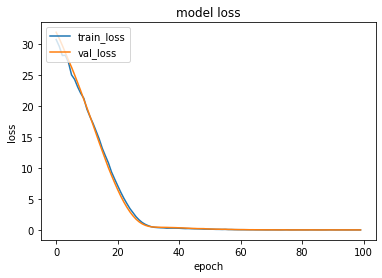

In [84]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

##2.4 Prediction
이제 우리가 만들었던 testX를 이용하여 prediction을 해봅시다. 추세에 맞는 데이터가 만들어지는지 확인해 보세요. model.predict() 함수를 이용하면 학습한 모델에서의 prediction 값을 알 수 있습니다.

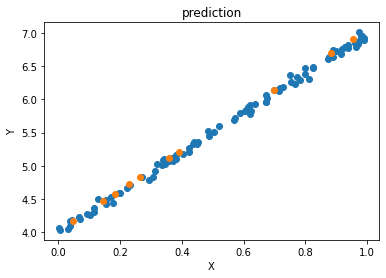

In [85]:
predY = model.predict(testX)
plt.scatter(trainX, trainY)
plt.scatter(testX, predY)
plt.title('prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##2.5 Other models
Multi-layer는 Neural Network는 Linear function 뿐만 아니라 다양한 nonlinear 함수도 예측할 수 있습니다. 다음과 같은 함수를 만들어서 위와 같은 방법으로 추세에 맞는 prediction이 나오는지 visualize해보세요. 학습이 잘 되도록 모델을 구성해보고 layer 개수. 층의 개수, learning rate 등을 바꾸면서 테스트해보세요.


1.   자유낙하공식 : 이제 여러분은 뉴턴의 공식을 알지 못해도 위치를 추정할 수 있습니다.
$$y = 9.8 x^2 + random noise\tag{2}$$
2.   삼각함수공식 : 대표적인 nonlinear 함수인 사인 함수를 추정해보세요.
$$y = sin(x)\tag{2}$$


In [0]:
### START CODE HERE ###

### END CODE HERE ###

# 2.5.1 자유낙하공식
$$y = 9.8 x^2 + random noise\tag{2}$$
위 식을 기반으로 X의 train sample을 700개, test sample을 300개 생성한 후 MLP로 predict해보겠습니다.



In [86]:
### START CODE HERE ###
trainX_1 = np.random.rand(700,)
testX_1 = np.random.rand(300,)
trainY_1 = 9.8*(trainX_1**2) + np.random.randn(*trainX_1.shape)*0.3 #Noise추가

trainX_1.shape

(700,)

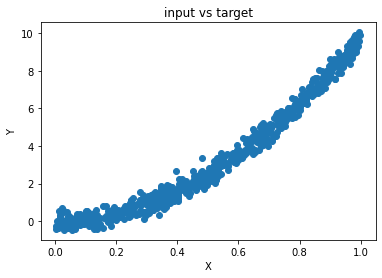

In [87]:

plt.scatter(trainX_1, trainY_1)
plt.title('input vs target')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [88]:
### START CODE HERE ###
model_2= tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, input_shape = (1,), activation = 'relu'),
  tf.keras.layers.Dense(64,activation = 'relu'),
  tf.keras.layers.Dense(1)
                                    
])
model_2.summary()

### END CODE HERE ###

Model: "sequential_434"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_870 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_871 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_872 (Dense)            (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [91]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.RMSprop(learning_rate)
model_2.compile(loss='mse', optimizer=optimizer)

history_2 = model_2.fit(trainX_1, trainY_1, epochs=100, validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 15.0052 - val_loss: 14.9152
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 11.2460 - val_loss: 10.2756
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 7.3544 - val_loss: 6.5769
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 4.7168 - val_loss: 4.1778
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 3.4637 - val_loss: 3.1599
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 2.8639 - val_loss: 2.5932
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 2.3865 - val_loss: 2.0496
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 1.8857 - val_loss: 1.6236
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4392 - val_loss: 1.1712
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 1.0703 - val_loss: 0.8880
Epoch

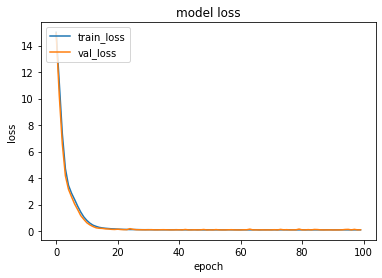

In [92]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

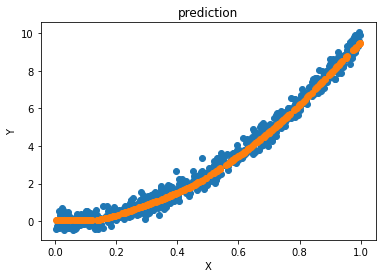

In [93]:
predY_1 = model_2.predict(testX_1)
plt.scatter(trainX_1, trainY_1)
plt.scatter(testX_1, predY_1)
plt.title('prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

처음 쌓았던 model과 같은 구조로 실험해 보았다. 거의 17epoch만에 최적화가 되는 것을 알 수 있고, loss도 거의 0에 가깝고 train과 validation data의 loss차이가 없는 것으로 보아 overfitting이 되지않고 이상적으로 optimization되었다.. 거의 최적의 model이라고 할 수 있다. (더이상의 parameter수정이 의미없다고 판단된다.)

**2.5.2 삼각함수 공식**
$$y = sin(x)\tag{2}$$


In [112]:
### START CODE HERE ###

trainX_2 = np.random.rand(700,)
testX_2 = np.random.rand(300,)
trainY_2 = np.sin(trainX_2) + np.random.randn(*trainX_2.shape)*0.02 #Noise추가

trainX_2.shape

(700,)

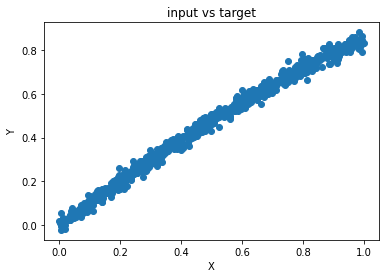

In [113]:

plt.scatter(trainX_2, trainY_2)
plt.title('input vs target')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [114]:
### START CODE HERE ###
model_3= tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, input_shape = (1,), activation = 'relu'),
  tf.keras.layers.Dense(128,activation = 'relu'),
  tf.keras.layers.Dense(32,activation = 'relu'),
  tf.keras.layers.Dense(1)
                                    
])
model_3.summary()

### END CODE HERE ###

Model: "sequential_435"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_873 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_874 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_875 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_876 (Dense)            (None, 1)                 33        
Total params: 12,609
Trainable params: 12,609
Non-trainable params: 0
_________________________________________________________________


In [115]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.RMSprop(learning_rate)
model_3.compile(loss='mse', optimizer=optimizer)

history_3 = model_3.fit(trainX_2, trainY_2, epochs=100, validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0501 - val_loss: 0.0031
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 9.0637e-04
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 8.8243e-04 - val_loss: 0.0011
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 9.2102e-04 - val_loss: 5.8251e-04
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 7.4062e-04 - val_loss: 0.0031
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 8.5821e-04 - val_loss: 5.6285e-04
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 8.7246e-04 - val_loss: 0.0020
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 9.2547e-04 - val_loss: 0.0019
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss:

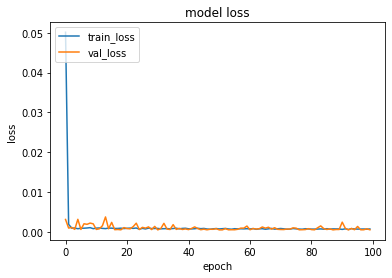

In [116]:
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

data에 비해 dense가 깊고 hidden unit이 많아 overfitting이 일어났다. dense와 unit수를 줄여서 다시 model을 구성해보자

In [117]:

model_4= tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, input_shape = (1,), activation = 'relu'),
  tf.keras.layers.Dense(64,activation = 'relu'),
  tf.keras.layers.Dense(1)
                                    
])
model_4.summary()
learning_rate = 0.001
optimizer = tf.keras.optimizers.RMSprop(learning_rate)
model_4.compile(loss='mse', optimizer=optimizer)

history_4 = model_4.fit(trainX_2, trainY_2, epochs=100, validation_split = 0.2)


Model: "sequential_436"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_877 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_878 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_879 (Dense)            (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1136 - val_loss: 0.0187
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0040
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 9.5651e-04

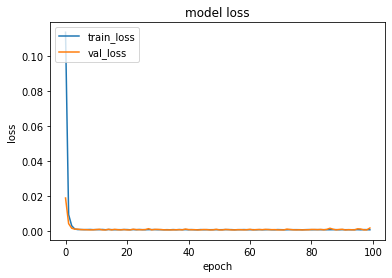

In [118]:
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

4-epoch정도에서 빠르게 수렴한 것을 알 수 있다. optimizer를 Adam으로 바꾸어 보겠다.
epoch은 50으로 줄여보겠다.

In [119]:

model_5= tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, input_shape = (1,), activation = 'relu'),
  tf.keras.layers.Dense(64,activation = 'relu'),
  tf.keras.layers.Dense(1)
                                    
])
model_5.summary()
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)
model_5.compile(loss='mse', optimizer=optimizer)

history_5 = model_5.fit(trainX_2, trainY_2, epochs=100, validation_split = 0.2)


Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_880 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_881 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_882 (Dense)            (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1401 - val_loss: 0.0216
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0063
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0024 - v

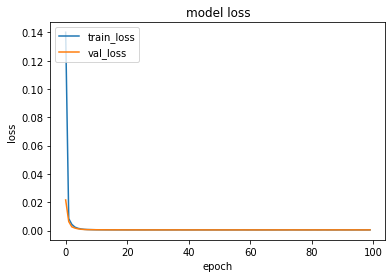

In [120]:
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

비슷한 결과가 나왔다. 
2.5.1과 2.5.2의 data가 비교적 간단했기 때문에 얕은 model에서도 잘 최적화 되며 parameter에 크게 sensitive하지 않았다.

#3. Classification
Multi-layer Neural Network는 classification에서도 높은 성능을 나타냅니다.
이 부분은 tensorflow의 공식 사이트에서 제공하는 예제가 훌륭하기 때문에 링크로 대체하겠습니다.

https://www.tensorflow.org/tutorials/keras/classification?hl=ko

이 링크를 보고 layer 개수, node 개수 등 모델의 parameter를 바꿔서 보다 높은 분류 성능이 나오도록 네트워크를 바꿔보세요.


In [43]:
### START CODE HERE ###
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.2.0-rc3



**Data Load**\
10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
# data loader
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [45]:
train_images.shape #train data 형태 확인

(60000, 28, 28)

In [47]:
len(train_labels), train_labels.shape

(60000, (60000,))

In [48]:
train_labels #총 10개의 class로 이루어진 label(0~9)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [49]:
test_images.shape

(10000, 28, 28)

In [50]:
len(test_labels)

10000

train:test = 6:1

**Preprocessing**

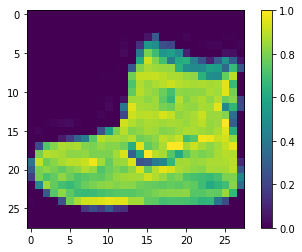

In [60]:
#image plot해보기
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Pixel값을 normalization하여 0~1로 하기위해 scaling
train_images = train_images / 255.0

test_images = test_images / 255.0


data가 image이기 때문에 CNN이 효과적일것이라고 예상하지만, 우선 MLP로 model을 생성해 보겠다.
parameter를 조정하면서 score를 높이는 parameter들을 찾아가보아야 한다.
parameter를 조정해가며 loss를 직접 비교하는 방법도 있지만, 자동으로 prameter를 비교해주는 grid search를 사용해 보겠다. Baseline은 tensorflow 튜토리얼에 있는 model을 참고하였다.

In [0]:
# scikit-learn의 GridSearchCV와 KerasClassifier 이용
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [0]:
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.layers import Activation
#Swish함수는 tf 2.1.0부터는 내장되어 있지만 2.0이하 model에서는 이렇게 function을 직접 생성한 후 사용해야 합니다.
def swish(x, beta = 1):
    return (x * tf.keras.backend.sigmoid(beta * x))
get_custom_objects().update({'swish': Activation(swish)})

In [0]:
def create_model(_optimizer, _lr, _batch_norm, _activation, _dropout):
    """
    기법 간 비교를 위한 모델 생성 (FC 3-Layer)
    """

    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization()  if _batch_norm else '', 
    keras.layers.Dropout(_dropout),    
    keras.layers.Dense(128, activation=_activation),
    keras.layers.Dense(10, activation='softmax')])

    optimizer = getattr(tf.keras.optimizers, _optimizer)(learning_rate=_lr)

    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

# KerasClassifier로 모델 생성기 설정
model = KerasClassifier(build_fn=create_model, verbose=3)

In [0]:
# Grid 설정
param_grid = {
    'batch_size': [512, 1024],
    'epochs': [15],
    '_optimizer': ['RMSprop','Adam'], 
    '_lr': [1e-3, 2e-3, 1e-2], 
    '_batch_norm': [1, 0], 
    '_activation': ['relu','selu','swish'],
    '_dropout': [0.2, 0.4], 
}

In [66]:
param_grid

{'_activation': ['relu', 'selu', 'swish'],
 '_batch_norm': [1, 0],
 '_dropout': [0.2, 0.4],
 '_lr': [0.001, 0.002, 0.01],
 '_optimizer': ['RMSprop', 'Adam'],
 'batch_size': [512, 1024],
 'epochs': [15]}

In [0]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(train_images, train_labels,
                       validation_data=(test_images, test_labels)
                       ) #Grid Search 학습
grid_result

Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: The added layer must be an instance of class Layer. Found: 

  FitFailedWarning)


Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/1

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f94b4a14128>,
             iid='deprecated', n_jobs=None,
             param_grid={'_activation': ['relu', 'selu', 'swish'],
                         '_batch_norm': [1, 0], '_dropout': [0.2, 0.4],
                         '_lr': [0.001, 0.002, 0.01],
                         '_optimizer': ['RMSprop', 'Adam'],
                         'batch_size': [512, 1024], 'epochs': [15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
grid_result.cv_results_['rank_test_score'] # 테스트 Score 순위
grid_result.cv_results_['mean_test_score'] # 테스트 Score 평균
grid_result.cv_results_['std_test_score'] # 테스트 Score std

array([0.00405921, 0.01710756, 0.00039371, 0.000829  , 0.00093928,
       0.00747466, 0.0020054 , 0.00514658, 0.0164313 , 0.01993591,
       0.00107417, 0.00602942, 0.00202374, 0.01121746, 0.002288  ,
       0.00311725, 0.0025262 , 0.01150236, 0.00373654, 0.00196312,
       0.00850336, 0.01232749, 0.00446044, 0.00474874,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.00700439, 0.02693575,
       0.00294543, 0.00168144, 0.01049962, 0.00501249, 0.00235406,
       0.00344341, 0.01631121, 0.01839904, 0.00224438, 0.00124568,
       0.00494322, 0.00689976, 0.00285782, 0.00127867, 0.00527972,
       0.01798259, 0.0019028 , 0.00116499, 0.01421515, 0.04205475,
       0.00280545, 0.00524252,        nan,        nan,        

In [0]:
grid_result.best_params_

{'_activation': 'swish',
 '_batch_norm': 1,
 '_dropout': 0.2,
 '_lr': 0.001,
 '_optimizer': 'Adam',
 'batch_size': 512,
 'epochs': 15}

In [0]:
grid_result.best_score_

0.8903666734695435

In [0]:
# 시각화를 위한 전처리
grid_params = grid_result.cv_results_['params']
for i in range(len(grid_params)):
    for key in ['mean_test_score', 'std_test_score', 'mean_fit_time']:
        grid_params[i][key] = grid_result.cv_results_[key][i]

In [0]:
import json

In [0]:
# grid_params 결과 저장
with open('grid_result.json','w') as f:
    f.write(json.dumps(grid_params))

In [0]:
# grid_params 결과 불러오기
with open('grid_result.json','r') as f:
    grid_params = json.loads(f.read())

**Grid Search 결과 시각화**\
시각화로 Facebook Research의 Hiplot( https://github.com/facebookresearch/hiplot )을 사용하였다.
특히 고차원의 데이터 간의 패턴을 보기에 용이하다고 한다.

In [0]:
!pip install hiplot


In [0]:
import hiplot as hip
#결과 시각화 
hip.Experiment.from_iterable(grid_params).display()

<IPython.core.display.Javascript object>